In [ ]:
!pip install autogluon.multimodal


In [ ]:
%matplotlib inline

import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(123)

In [ ]:
from autogluon.core.utils.loaders import load_pd
train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet')
test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet')
subsample_size = 1000  # subsample data for faster demo, try setting this to larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head(10)

Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet | Columns = 2 / 2 | Rows = 67349 -> 67349
Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet | Columns = 2 / 2 | Rows = 872 -> 872


,sentence,label
43787,very pleasing at its best moments,1
16159,", american chai is enough to make you put away...",0
59015,too much like an infomercial for ram dass 's l...,0
5108,a stirring visual sequence,1
67052,cool visual backmasking,1
35938,hard ground,0
49879,"the striking , quietly vulnerable personality ...",1
51591,pan nalin 's exposition is beautiful and myste...,1
56780,wonderfully loopy,1
28518,"most beautiful , evocative",1


In [ ]:
!pip uninstall -y torchaudio torch
!pip install torchaudio torch

Found existing installation: torchaudio 2.4.0+cu121
Uninstalling torchaudio-2.4.0+cu121:
  Successfully uninstalled torchaudio-2.4.0+cu121
Found existing installation: torch 2.3.1
Uninstalling torch-2.3.1:
  Successfully uninstalled torch-2.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 8.9.2.26
    Uninstalling nvidia-cudnn-cu12-8.9.2.26:
      Successfully uninstalled nvidia-cudnn-cu12-8.9.2.26
ERROR: pip's dependency resolver does not currently take into account all the pac

In [ ]:
!pip install torch torchvision
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
predictor = MultiModalPredictor(label='label', eval_metric='acc', path=model_path)
predictor.fit(train_data, time_limit=180)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.4.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       10.52 GB / 12.67 GB (83.0%)
Disk Space Avail:   65.05 GB / 107.72 GB (60.4%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/tmp/791532ef54a9

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

GPU Count: 0
GPU Count to be Used: 0

INFO: GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: 
  | Name              | Type                         | Params | Mode 
---------------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 108 M  | train
1 | validation_metric | MulticlassAccuracy           | 0      | train
2 | loss_func         | CrossEntropyLoss             | 0      | train
---------------------------------------------------------------------------
108 M     Trainable params
0         Non-trainable params
108 M     Total params
435.573   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Time limit reached. Elapsed time is 0:03:01. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 2: 'val_acc' reached 0.49000 (best 0.49000), saving model to '/content/tmp/791532ef54a94e7b90a5c799e3613749-automm_sst/epoch=0-step=2.ckpt' as top 3
AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/791532ef54a94e7b90a5c799e3613749-automm_sst")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
test_score = predictor.evaluate(test_data)
print(test_score)

Predicting: |          | 0/? [00:00<?, ?it/s]

{'acc': 0.5080275229357798}


In [ ]:
test_score = predictor.evaluate(test_data, metrics=['acc', 'f1'])
print(test_score)

Predicting: |          | 0/? [00:00<?, ?it/s]

{'acc': 0.5080275229357798, 'f1': 0.5814634146341463}


In [ ]:
sentence1 = "it's a charming and often affecting journey."
sentence2 = "It's slow, very, very, very slow."
predictions = predictor.predict({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])

Predicting: |          | 0/? [00:00<?, ?it/s]

"Sentence": it's a charming and often affecting journey. "Predicted Sentiment": 1
"Sentence": It's slow, very, very, very slow. "Predicted Sentiment": 0


In [ ]:
probs = predictor.predict_proba({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Class-Probabilities":', probs[0])
print('"Sentence":', sentence2, '"Predicted Class-Probabilities":', probs[1])

Predicting: |          | 0/? [00:00<?, ?it/s]

"Sentence": it's a charming and often affecting journey. "Predicted Class-Probabilities": [0.44354808 0.5564519 ]
"Sentence": It's slow, very, very, very slow. "Predicted Class-Probabilities": [0.5999152  0.40008476]


In [ ]:
test_predictions = predictor.predict(test_data)
test_predictions.head()

Predicting: |          | 0/? [00:00<?, ?it/s]

,label
0,1
1,1
2,0
3,1
4,0


In [ ]:
loaded_predictor = MultiModalPredictor.load(model_path)
loaded_predictor.predict_proba({'sentence': [sentence1, sentence2]})

Load pretrained checkpoint: /content/tmp/791532ef54a94e7b90a5c799e3613749-automm_sst/model.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

array([[0.44354808, 0.5564519 ],
       [0.5999152 , 0.40008476]], dtype=float32)

In [ ]:
new_model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
loaded_predictor.save(new_model_path)
loaded_predictor2 = MultiModalPredictor.load(new_model_path)
loaded_predictor2.predict_proba({'sentence': [sentence1, sentence2]})

Load pretrained checkpoint: /content/tmp/a11c299a78894b99ad79344b5017afac-automm_sst/model.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

array([[0.44354808, 0.5564519 ],
       [0.5999152 , 0.40008476]], dtype=float32)

In [ ]:
embeddings = predictor.extract_embedding(test_data)
print(embeddings.shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(872, 768)


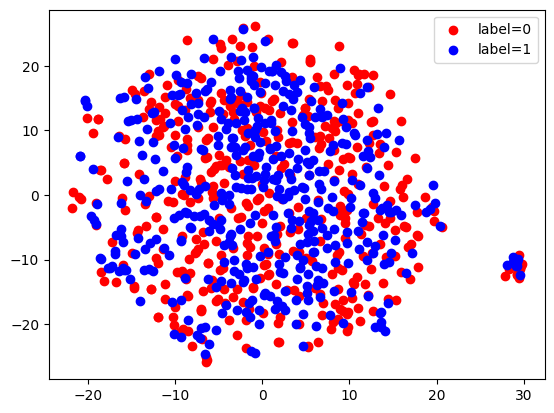

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state=123).fit_transform(embeddings)
for val, color in [(0, 'red'), (1, 'blue')]:
    idx = (test_data['label'].to_numpy() == val).nonzero()
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], c=color, label=f'label={val}')
plt.legend(loc='best')

In [ ]:
sts_train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/train.parquet')[['sentence1', 'sentence2', 'score']]
sts_test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/dev.parquet')[['sentence1', 'sentence2', 'score']]
sts_train_data.head(10)

Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/train.parquet | Columns = 4 / 4 | Rows = 5749 -> 5749
Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/dev.parquet | Columns = 4 / 4 | Rows = 1500 -> 1500


,sentence1,sentence2,score
0,A plane is taking off.,An air plane is taking off.,5.00
1,A man is playing a large flute.,A man is playing a flute.,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,Three men are playing chess.,Two men are playing chess.,2.60
4,A man is playing the cello.,A man seated is playing the cello.,4.25
5,Some men are fighting.,Two men are fighting.,4.25
6,A man is smoking.,A man is skating.,0.50
7,The man is playing the piano.,The man is playing the guitar.,1.60
8,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,2.20
9,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,5.00


In [ ]:
print('Min score=', min(sts_train_data['score']), ', Max score=', max(sts_train_data['score']))

Min score= 0.0 , Max score= 5.0


In [ ]:
sts_model_path = f"./tmp/{uuid.uuid4().hex}-automm_sts"
predictor_sts = MultiModalPredictor(label='score', path=sts_model_path)
predictor_sts.fit(sts_train_data, time_limit=60)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.4.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       8.40 GB / 12.67 GB (66.3%)
Disk Space Avail:   63.78 GB / 107.72 GB (59.2%)
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and label-values can't be converted to int).
	Label info (max, min, mean, stddev): (5.0, 0.0, 2.701, 1.4644)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you ha

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Time limit reached. Elapsed time is 0:01:00. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/e7776630e0dd4314a41f72d173d0f629-automm_sts")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
test_score = predictor_sts.evaluate(sts_test_data, metrics=['rmse', 'pearsonr', 'spearmanr'])
print('RMSE = {:.2f}'.format(test_score['rmse']))
print('PEARSONR = {:.4f}'.format(test_score['pearsonr']))
print('SPEARMANR = {:.4f}'.format(test_score['spearmanr']))

Predicting: |          | 0/? [00:00<?, ?it/s]

RMSE = 1.45
PEARSONR = 0.3313
SPEARMANR = 0.3112


In [ ]:
sentences = ['The child is riding a horse.',
             'The young boy is riding a horse.',
             'The young man is riding a horse.',
             'The young man is riding a bicycle.']

score1 = predictor_sts.predict({'sentence1': [sentences[0]],
                                'sentence2': [sentences[1]]}, as_pandas=False)

score2 = predictor_sts.predict({'sentence1': [sentences[0]],
                                'sentence2': [sentences[2]]}, as_pandas=False)

score3 = predictor_sts.predict({'sentence1': [sentences[0]],
                                'sentence2': [sentences[3]]}, as_pandas=False)
print(score1, score2, score3)

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

2.5426636 2.6705198 2.4033961
